<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class6/program04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet50으로 자연 영상 인식하기

In [1]:
import numpy as np
import cv2 as cv

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow

In [2]:
# ImageNet으로 학습한 ResNet50을 백본으로 사용
model = ResNet50(weights='imagenet')

In [3]:
img = cv.imread('/content/drive/MyDrive/컴퓨터비전/Class6/rabbit.jpg')
x = np.reshape(cv.resize(img,(224,224)), (1,224,224,3))
x = preprocess_input(x)

In [4]:
preds = model.predict(x)
top5 = decode_predictions(preds, top=5)[0]
print('예측 결과: ', top5)

1/1 [==============================] - 6s 6s/step
예측 결과:  [('n02325366', 'wood_rabbit', 0.7427542), ('n02326432', 'hare', 0.24023649), ('n02328150', 'Angora', 0.008815723), ('n01877812', 'wallaby', 0.0026892489), ('n02356798', 'fox_squirrel', 0.0012279322)]


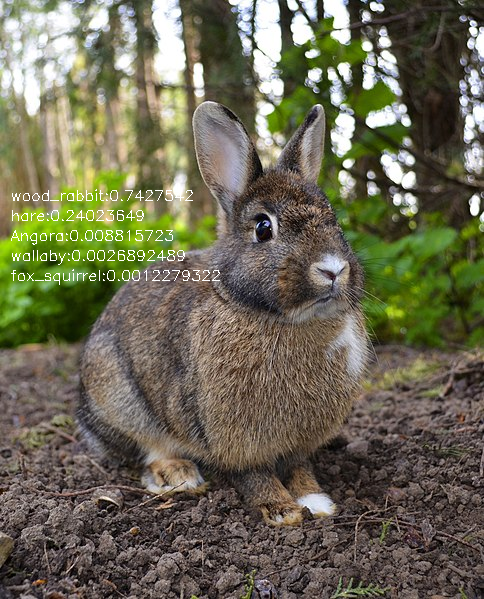

In [5]:
for i in range(5):
  cv.putText(img, top5[i][1]+':'+str(top5[i][2]), (10, 200+i*20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
cv2_imshow(img)